In [2]:
import pandas as pd
import os
import json

# Specify the directory you're working from
path_to_json = '../data/dataset'
json_files = [pos_json for pos_json in os.listdir(path_to_json) if pos_json.endswith('.json')]

# Here we create our empty DataFrame
df = pd.DataFrame()

# We process each json file
for index, js in enumerate(json_files):
    with open(os.path.join(path_to_json, js)) as json_file:
        json_text = json.load(json_file)

    # We convert the json file to a pandas DataFrame
    file_data = pd.json_normalize(json_text)
    
    # We append each file to the bottom of our DataFrame
    df = df.append(file_data)

# Specify the output file path
output_path = '../data/combined.csv'

# Finally, we write the DataFrame to a CSV file
df.to_csv(output_path, index=False)


C:\Users\Dhia\AppData\Local\Temp\ipykernel_17140\3915464997.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(file_data)
C:\Users\Dhia\AppData\Local\Temp\ipykernel_17140\3915464997.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(file_data)
C:\Users\Dhia\AppData\Local\Temp\ipykernel_17140\3915464997.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(file_data)
C:\Users\Dhia\AppData\Local\Temp\ipykernel_17140\3915464997.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(file_data)
C:\Users\Dhia\AppData\Local\Temp\ipykernel_17140\3915464997.py:21: FutureWarning: The fr

In [3]:
ProfileReport(df)

NameError: name 'ProfileReport' is not defined

### Pandas Profiling:

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

from pandas_profiling import ProfileReport

C:\Users\Dhia\AppData\Local\Temp\ipykernel_17140\402316907.py:4: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


In [7]:
row_data = pd.read_csv('../data/combined.csv')

In [8]:
df = row_data.iloc[:, [3, 7, 10, 11, 12]]

df.loc[df['CONCLUSION'].str.contains('Inadmissible'), 'CONCLUSION'] = 'No violation'
df.loc[df['CONCLUSION'].str.contains('Violation'), 'CONCLUSION'] = 'Violation'
df.loc[~df['CONCLUSION'].str.contains('Violation'), 'CONCLUSION'] = 'No violation'

branch_mapping = {'CHAMBER': 1, 'ADMISSIBILITY': 2, 'COMMITTEE': 3, 'GRANDCHAMBER': 4}
df['BRANCH'] = df['BRANCH'].map(branch_mapping)

df.rename(columns={'BRANCH': 'importance'}, inplace=True)
df.rename(columns={'CONCLUSION': 'is_guilty'}, inplace=True)
df.rename(columns={'VIOLATED_ARTICLES': 'nb_violated_articles'}, inplace=True)
df.rename(columns={'VIOLATED_PARAGRAPHS': 'nb_violated_paragraphs'}, inplace=True)
df.rename(columns={'VIOLATED_BULLETPOINTS': 'nb_violated_bulletpoints'}, inplace=True)

df['is_guilty'] = df['is_guilty'].replace({'No violation': 1, 'Violation': 0})

df.iloc[:, [2, 3, 4]] = df.iloc[:, [2, 3, 4]].apply(lambda x: x.apply(lambda lst: len(eval(lst)) if isinstance(lst, str) else 0))

columns = list(df.columns)
columns.append(columns.pop(1))
df = df[columns]

C:\Users\Dhia\AppData\Local\Temp\ipykernel_17140\2870602502.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[df['CONCLUSION'].str.contains('Inadmissible'), 'CONCLUSION'] = 'No violation'
C:\Users\Dhia\AppData\Local\Temp\ipykernel_17140\2870602502.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[df['CONCLUSION'].str.contains('Violation'), 'CONCLUSION'] = 'Violation'
C:\Users\Dhia\AppData\Local\Temp\ipykernel_17140\2870602502.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

In [9]:
df

,importance,nb_violated_articles,nb_violated_paragraphs,nb_violated_bulletpoints,is_guilty
0,2,0,0,0,1
1,1,0,0,0,0
2,1,0,0,0,0
3,1,4,0,0,0
4,1,1,1,0,0
...,...,...,...,...,...
11473,2,0,0,0,1
11474,2,0,0,0,1
11475,1,1,0,0,0
11476,1,0,0,0,1


In [10]:
import random
from decimal import Decimal, ROUND_HALF_UP

# Create a function to calculate the cost based on importance and violation counts
def calculate_cost(row):
    importance = row['importance']
    nb_violated_articles = int(row['nb_violated_articles'])
    nb_violated_paragraphs = int(row['nb_violated_paragraphs'])
    nb_violated_bulletpoints = int(row['nb_violated_bulletpoints'])
    is_guilty = row['is_guilty']
    
    # Define the minimum cost for each importance level with randomization
    def randomize_price(base_price):
        percentage = random.uniform(0.01, 0.03)
        return round(base_price + base_price * percentage, 2)

    random_minimum_cost = {
        1: randomize_price(150000),
        2: randomize_price(60000),
        3: randomize_price(5000),
        4: randomize_price(400)
    }
  
    # Calculate the base cost based on importance
    base_cost = Decimal(str(random_minimum_cost[importance])).quantize(Decimal('0.00'), rounding=ROUND_HALF_UP)
    
    # Add additional costs based on violation increments with randomization
    cost = base_cost
    
    if nb_violated_bulletpoints > 0 and nb_violated_bulletpoints % 1 == 0:
        random_percentage = Decimal(str(round(random.uniform(0.01, 0.03), 2)))
        cost += (base_cost * random_percentage * Decimal(nb_violated_bulletpoints)).quantize(Decimal('0.00'), rounding=ROUND_HALF_UP)
    
    if nb_violated_paragraphs > 0 and nb_violated_paragraphs % 1 == 0:
        random_percentage = Decimal(str(round(random.uniform(0.01, 0.03), 2)))
        cost += (base_cost * random_percentage * Decimal(nb_violated_paragraphs)).quantize(Decimal('0.00'), rounding=ROUND_HALF_UP)
    
    if nb_violated_articles > 0 and nb_violated_articles % 1 == 0:
        random_percentage = Decimal(str(round(random.uniform(0.01, 0.03), 2)))
        cost += (base_cost * random_percentage * Decimal(nb_violated_articles)).quantize(Decimal('0.00'), rounding=ROUND_HALF_UP)
    
    if is_guilty == 1:
        adjustment_percentage = Decimal(str(round(random.uniform(0.4, 0.6), 2)))
        cost += (cost * adjustment_percentage).quantize(Decimal('0.00'), rounding=ROUND_HALF_UP)
    
    return cost

df['cost'] = df.apply(calculate_cost, axis=1)


In [11]:
df.head(5)

,importance,nb_violated_articles,nb_violated_paragraphs,nb_violated_bulletpoints,is_guilty,cost
0,2,0,0,0,1,98240.40
1,1,0,0,0,0,205788.79
2,1,0,0,0,0,202429.15
3,1,4,0,0,0,219946.15
4,1,1,1,0,0,211811.50


In [175]:
# Save the dataset
# df.to_csv('../data/clean_dataset.csv', index=False)

In [176]:
df.describe()

,importance,nb_violated_articles,nb_violated_paragraphs,nb_violated_bulletpoints,is_guilty
count,11478.000000,11478.00000,11478.000000,11478.000000,11478.000000
mean,1.596097,0.77348,0.511065,0.071877,0.439101
std,0.781278,0.89586,0.759138,0.280917,0.496299
min,1.000000,0.00000,0.000000,0.000000,0.000000
25%,1.000000,0.00000,0.000000,0.000000,0.000000
50%,1.000000,1.00000,0.000000,0.000000,0.000000
75%,2.000000,1.00000,1.000000,0.000000,1.000000
max,4.000000,9.00000,7.000000,3.000000,1.000000


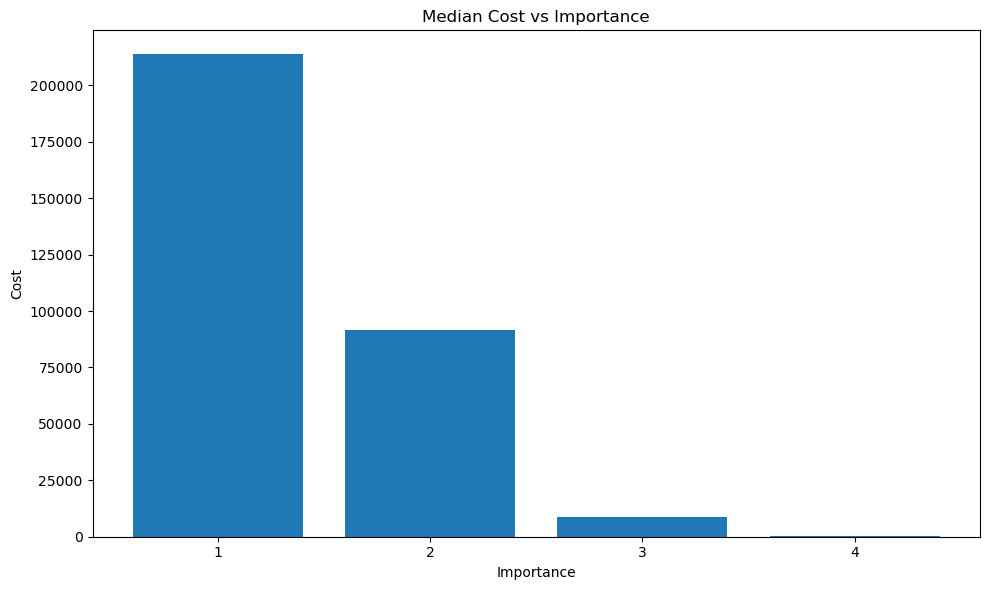

In [177]:
# Calculate the average cost for each importance level
med_cost = df.groupby('importance')['cost'].median()

# Create a bar plot for 'importance' versus 'cost'
plt.figure(figsize=(10, 6))
plt.bar(med_cost.index, med_cost.values)
plt.xlabel('Importance')
plt.ylabel('Cost')
plt.title('Median Cost vs Importance')
plt.xticks([1, 2, 3, 4])
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

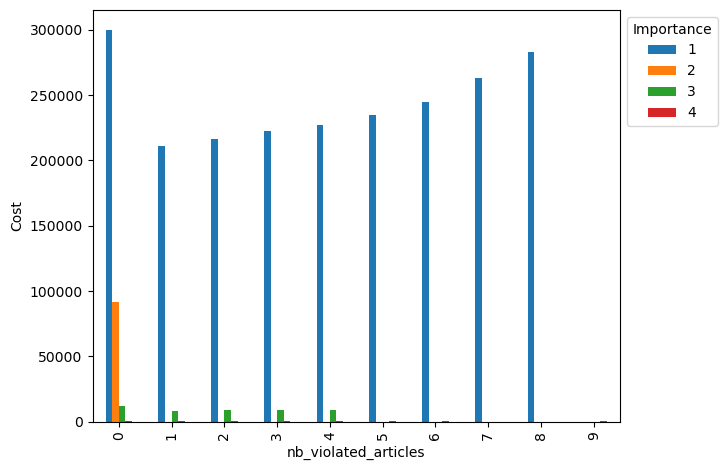

<Figure size 1000x600 with 0 Axes>

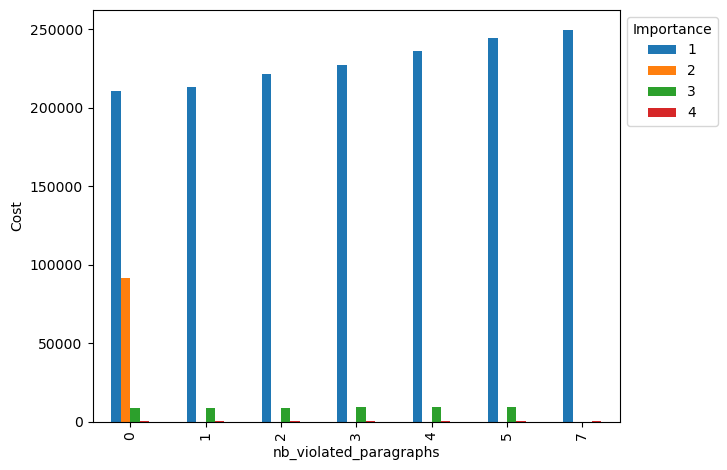

<Figure size 1000x600 with 0 Axes>

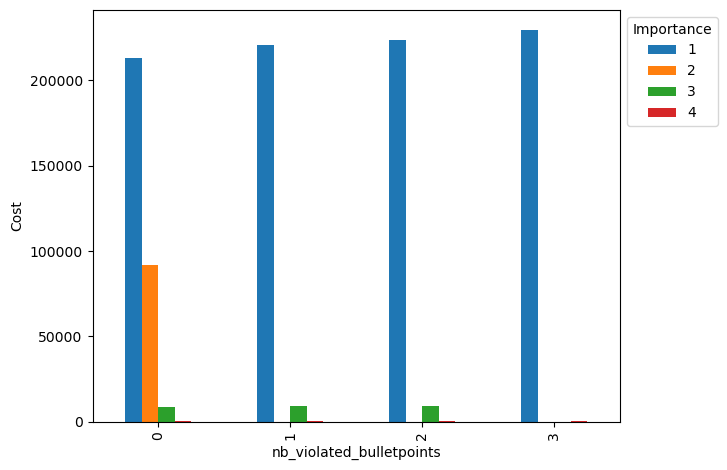

<Figure size 1000x600 with 0 Axes>

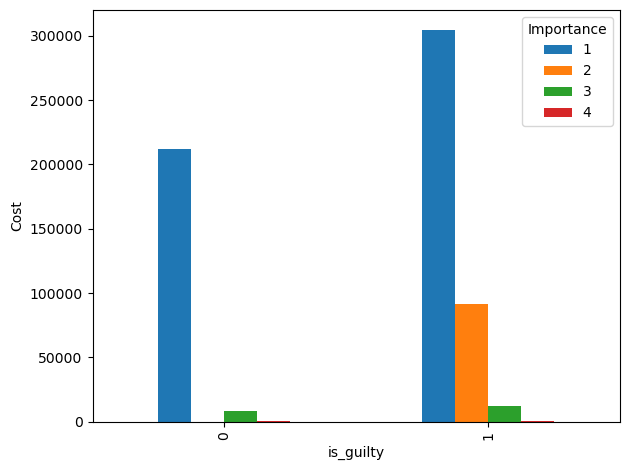

In [178]:
for column in df.columns:
    if column != 'cost' and column != 'importance':
        # Group the data by both the current column and 'importance' column
        grouped_data = df.groupby([column, 'importance'])['cost'].median().unstack()

        plt.figure(figsize=(10, 6))
        grouped_data.plot(kind='bar')
        plt.xlabel(column)
        plt.ylabel('Cost')
        plt.xticks(rotation='vertical')
        plt.tight_layout()
        plt.legend(bbox_to_anchor=(1, 1), title='Importance')
        
        plt.show()

C:\Users\Dhia\AppData\Local\Temp\ipykernel_16040\2722664934.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


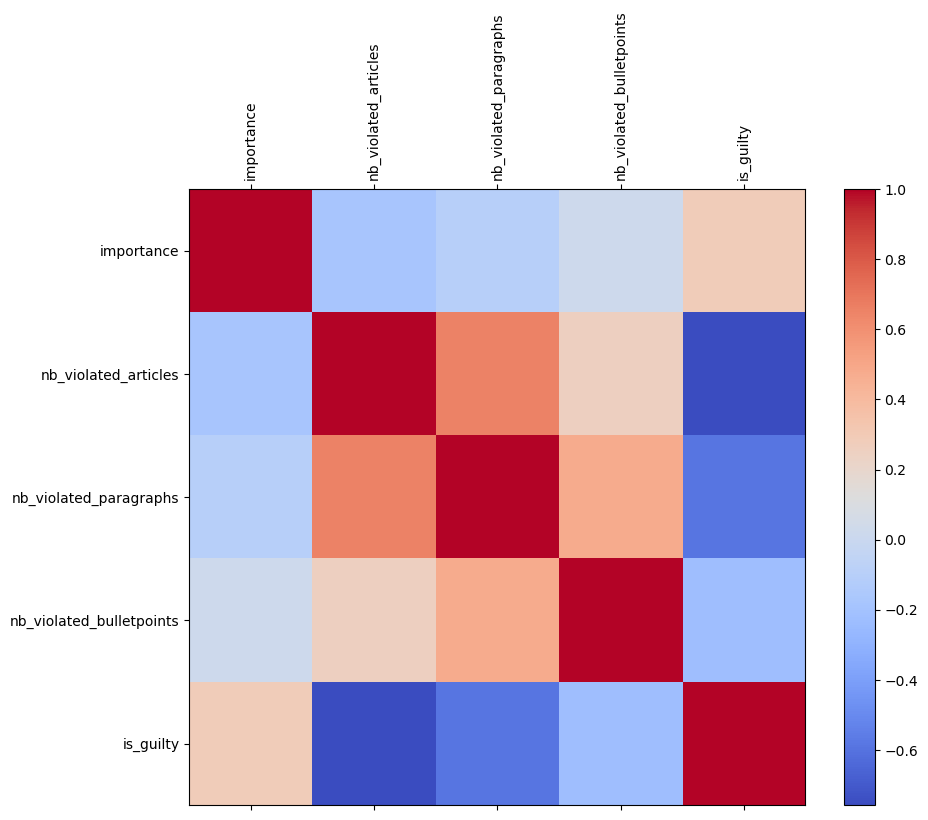

In [179]:
corr_matrix = df.corr()

fig, ax = plt.subplots(figsize=(10, 8))  # Setting the figure size
cax = ax.matshow(corr_matrix, cmap='coolwarm')  # Creating a matrix plot with colormap
fig.colorbar(cax)  # Adding a color bar to the plot
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=90)  # Setting x-axis labels
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)  # Setting y-axis labels
plt.show()

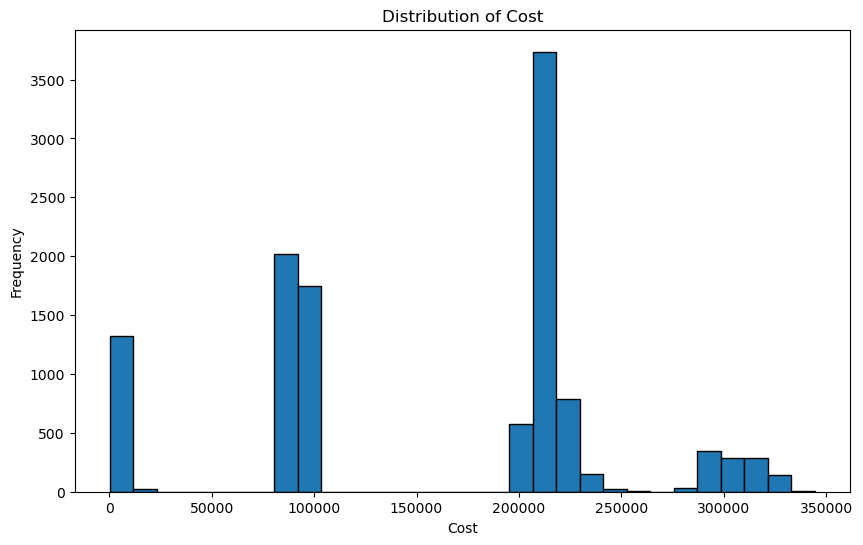

In [180]:
plt.figure(figsize=(10, 6))
plt.hist(df['cost'], bins=30, edgecolor='black')
plt.title('Distribution of Cost')
plt.xlabel('Cost')
plt.ylabel('Frequency')
plt.show()

In [181]:
print('Skewness:', df['cost'].skew())
print('Kurtosis:', df['cost'].kurtosis())


Skewness: -0.16506606071715993
Kurtosis: -0.9473342622804237


Skewness quantifies how symmetrical the distribution is, and Kurtosis quantifies whether the shape of the data distribution matches the Gaussian distribution or not. A skewness value > 0 means that there is more weight in the left tail of the distribution and < 0 means more weight in the right tail. Kurtosis of exactly 3 indicates a normal distribution. High kurtosis (>3) indicates a lot of outliers, and low kurtosis (<3) indicates lack of outliers.

In this case, the skewness is -0.125, which is close to 0. This indicates that the data is approximately symmetric, with a slight skew to the left since it is a negative value. A skewness value closer to 0 is better, as it suggests that the data is fairly symmetrical.

While the kurtosis is -0.49, which is less than 3 (kurtosis for a normal distribution). This indicates that the data has lighter tails and a flatter peak than the normal distribution. It is called platykurtic. In terms of outliers, this means that there are fewer extreme values than one would expect in a normal distribution.

In [182]:
X = df.iloc[:, :5]
y = df.iloc[:, 5]

In [183]:
X.head(2)

,importance,nb_violated_articles,nb_violated_paragraphs,nb_violated_bulletpoints,is_guilty
0,2,0,0,0,1
1,1,0,0,0,0


In [184]:
y.value_counts()

640.96       2
90988.19     2
208598.03    2
416.73       2
596.63       2
            ..
8444.97      1
209201.32    1
220694.45    1
208504.61    1
212027.62    1
Name: cost, Length: 11454, dtype: int64

In [185]:
import numpy as np

random_state = np.random.RandomState(13)

# Compute the size of the smallest group and take 70% of it as the number of samples per group for training
n_samples_train = int(df['importance'].value_counts().min() * 0.7)

# Group the data by 'importance' and sample n_samples_train from each group for training
train_data = df.groupby('importance', group_keys=False).apply(lambda x: x.sample(min(len(x), n_samples_train), random_state=random_state))

# Get the remaining data as testing data
test_data = df.drop(train_data.index)

X_train = train_data.drop('cost', axis=1)
y_train = train_data['cost']

X_test = test_data.drop('cost', axis=1)
y_test = test_data['cost']

model = DecisionTreeRegressor(random_state=random_state)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {mse**0.5}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R2 ): {r2}")

Mean Squared Error (MSE): 25629828.70881659
Root Mean Squared Error (RMSE): 5062.5911062238265
Mean Absolute Error (MAE): 3371.4548691575674
R-squared (R2 ): 0.9963013758453941


In [186]:
import pickle

# Save the trained model to a file
with open('pred.pkl', 'wb') as f:
    pickle.dump(model, f)

In [187]:
with open('pred.pkl', 'rb') as f:
    model = pickle.load(f)

# Prepare some test data
# This should be a 2D array, where each row is a set of features for a data point.
# For example, here we'll just use one row with four features, all set to zero.
test_data = np.array([[1, 0, 0, 0, 1]])

# Use the model to make a prediction
prediction = model.predict(test_data)

# Print the prediction
print("Prediction: ", prediction)

Prediction:  [304874.5659375]


c:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
